In [21]:
## Plotting history 
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plotting training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()


In [62]:
## Plotting confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_val, y_pred, title):
    y_pred_classes = y_pred
    y_true_classes = y_val

    # Create and plot confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix:  ' + title)
    plt.show()



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../data/mendeley/HateSpeechDatasetBalanced.csv")
df.columns = df.columns.str.lower()

df.head()

,content,label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tweets = df['content'].tolist()
labels = df['label'].tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets) ## tokenizer fit to our vocabulary

tweet_sequences = tokenizer.texts_to_sequences(tweets)

max_sequence_length = 55  ## padding to ensure uniformity in length of the sequences
tweet_padded = pad_sequences(tweet_sequences, maxlen=max_sequence_length, padding='post')
print(tweet_padded[:2])
labels = np.array(labels)

[[ 2091     8   683     1  3998    18   635     2   256    16 22961    38
   2496   840     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [   37    43    87   568     2  2184    15 12837   492  2663   305     3
    800     4   423     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [7]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

## Defined for all models

embedding_dim = 55 
vocab_size = len(tokenizer.word_index) + 1
epochs = 5 
batch_size = 32  

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(tweet_padded, labels, test_size=0.2, random_state=42)



In [8]:
## the cnn model 


first_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

first_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

first_model.summary()

c:\Users\bemne\anaconda3\envs\al\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
first_history = first_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))


Epoch 1/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 839s 46ms/step - accuracy: 0.8353 - loss: 0.3658 - val_accuracy: 0.8732 - val_loss: 0.2899
Epoch 2/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 843s 46ms/step - accuracy: 0.9084 - loss: 0.2186 - val_accuracy: 0.8889 - val_loss: 0.2637
Epoch 3/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 837s 46ms/step - accuracy: 0.9420 - loss: 0.1467 - val_accuracy: 0.8898 - val_loss: 0.2715
Epoch 4/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 842s 46ms/step - accuracy: 0.9598 - loss: 0.1052 - val_accuracy: 0.8926 - val_loss: 0.3005
Epoch 5/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 887s 49ms/step - accuracy: 0.9701 - loss: 0.0799 - val_accuracy: 0.8913 - val_loss: 0.3159


In [13]:
first_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 55, 55)         │     7,536,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 51, 128)        │        35,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,739,909 (86.75 MB)

 Trainable params: 7,579,969 (28.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,159,940 (57.83 MB)

In [14]:
import pickle

# Save the training history
with open('../../histories/first_model_history.pkl', 'wb') as file:
    pickle.dump(first_history.history, file)

# Save model
first_model.save('../../models/first_model.keras')

In [25]:
from tensorflow.keras.models import load_model

# Load the model
loaded_first_model = load_model('../../models/first_model.keras')

# Load the training history
with open('../../histories/first_model_history.pkl', 'rb') as file:
    loaded_first_history = pickle.load(file)


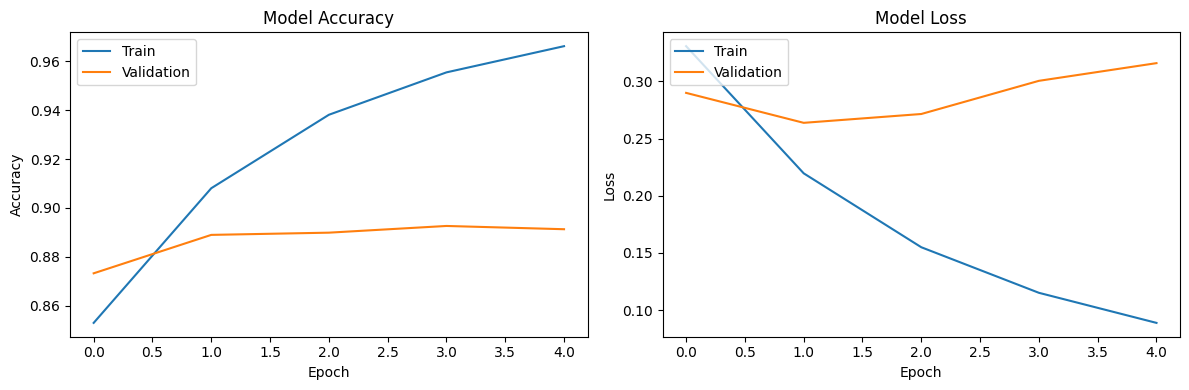

In [26]:
## plot model history 

plot_training_history(loaded_first_history)
# loaded_first_history

In [ ]:
## make predictions
y_pred = loaded_first_model.predict(X_val)


4539/4539 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step


In [ ]:
# print("Sample prediction probabilities:", y_pred[:10])
threshold=0.5
y_pred_classes = (y_pred > threshold).astype(int).flatten()
print("Sample prediction classes:", y_pred_classes[:10])


Sample prediction classes: [1 0 1 1 0 1 0 0 0 0]


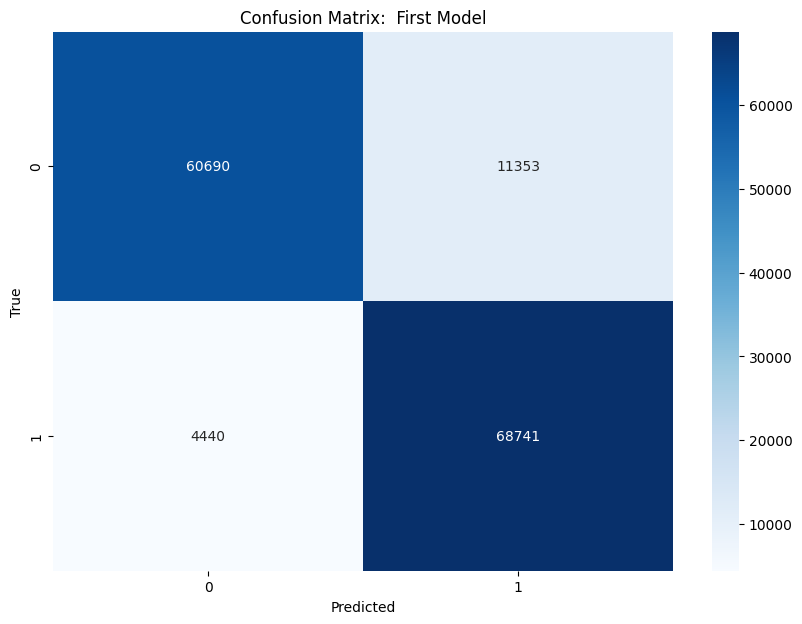

In [ ]:

## plotting function 
plot_confusion_matrix(y_val, y_pred_classes, title="First Model")

## Second model: Finetuning

Adding some dropout layers

In [42]:
from tensorflow.keras.layers import Dropout
model_dropout = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_dropout.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_dropout.summary()

c:\Users\bemne\anaconda3\envs\al\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
history_dropout = model_dropout.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))


Epoch 1/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 897s 49ms/step - accuracy: 0.8000 - loss: 0.4242 - val_accuracy: 0.8552 - val_loss: 0.3229
Epoch 2/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 931s 51ms/step - accuracy: 0.8705 - loss: 0.2998 - val_accuracy: 0.8714 - val_loss: 0.2958
Epoch 3/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 933s 51ms/step - accuracy: 0.8970 - loss: 0.2463 - val_accuracy: 0.8773 - val_loss: 0.2856
Epoch 4/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 935s 51ms/step - accuracy: 0.9134 - loss: 0.2103 - val_accuracy: 0.8810 - val_loss: 0.2828
Epoch 5/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 901s 50ms/step - accuracy: 0.9255 - loss: 0.1837 - val_accuracy: 0.8824 - val_loss: 0.2937


In [50]:
# Save the training history
with open('../../histories/model_with_dropout_history.pkl', 'wb') as file:
    pickle.dump(history_dropout.history, file)

# Save model
model_dropout.save('../../models/model_with_dropout.keras')

In [56]:
model_dropout.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 55, 55)         │     7,536,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 51, 128)        │        35,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,739,909 (86.75 MB)

 Trainable params: 7,579,969 (28.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,159,940 (57.83 MB)

In [51]:
# Load the model
loaded_model_dropout = load_model('../../models/model_with_dropout.keras')

# Load the training history
with open('../../histories/model_with_dropout_history.pkl', 'rb') as file:
    loaded_history_dropout = pickle.load(file)

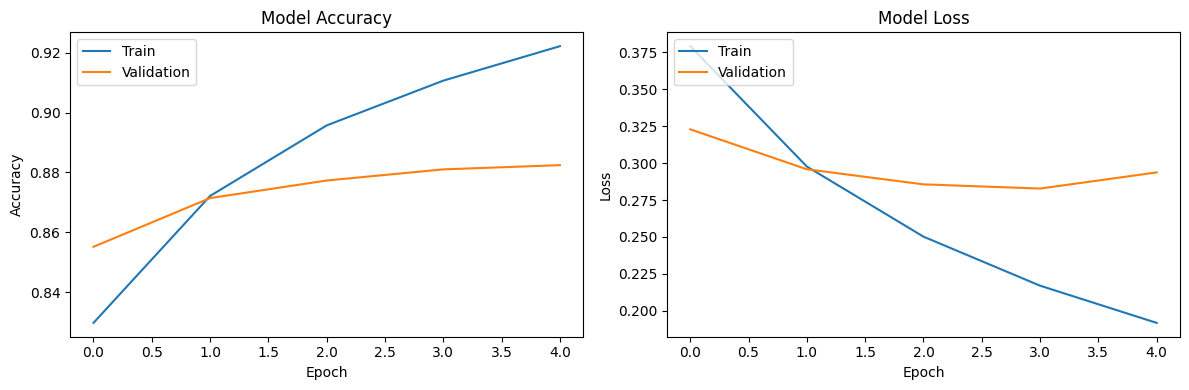

In [52]:
## plot model history 

plot_training_history(loaded_history_dropout)
# loaded_first_history

In [53]:
## make predictions
y_pred_dropout = loaded_model_dropout.predict(X_val)


4539/4539 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step


In [54]:
y_pred_dropout_classes = (y_pred_dropout > threshold).astype(int).flatten()
print("Sample prediction classes:", y_pred_classes[:10])


Sample prediction classes: [1 0 1 1 0 1 0 0 0 0]


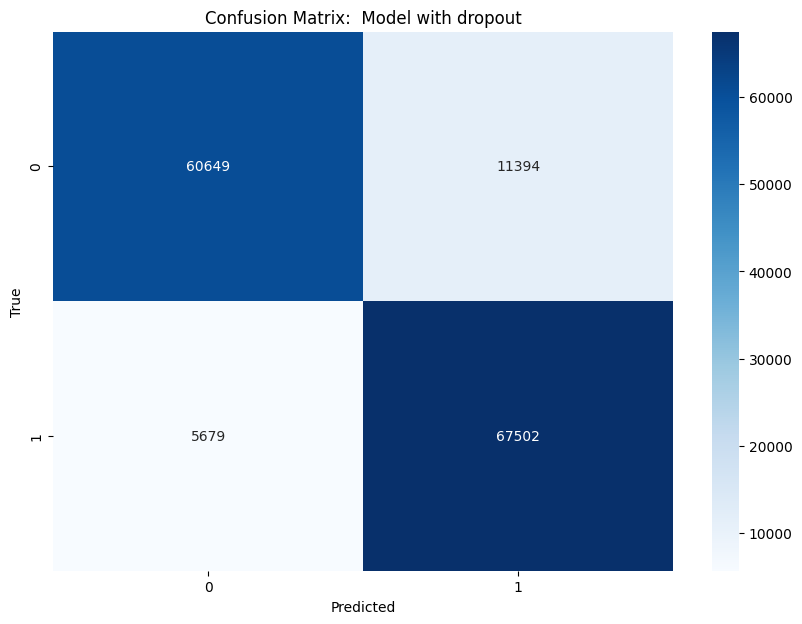

In [65]:

## plotting function 
plot_confusion_matrix(y_val, y_pred_dropout_classes, title="Model with dropout")

### batch normalization and regularization

In [66]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

model_regularization = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
    Conv1D(128, 5, activation='relu', kernel_regularizer=l2(0.001)),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model_regularization.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

model_regularization.summary()

c:\Users\bemne\anaconda3\envs\al\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
## updating epochs to further analyse the model
epochs= 15
history_regularization = model_regularization.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))


Epoch 1/15
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 920s 50ms/step - accuracy: 0.7761 - loss: 0.5368 - val_accuracy: 0.8419 - val_loss: 0.3886
Epoch 2/15
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 904s 50ms/step - accuracy: 0.8402 - loss: 0.4010 - val_accuracy: 0.8514 - val_loss: 0.3713
Epoch 3/15
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 855s 47ms/step - accuracy: 0.8526 - loss: 0.3780 - val_accuracy: 0.8564 - val_loss: 0.3618
Epoch 4/15
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 831s 46ms/step - accuracy: 0.8632 - loss: 0.3587 - val_accuracy: 0.8587 - val_loss: 0.3625
Epoch 5/15
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 834s 46ms/step - accuracy: 0.8699 - loss: 0.3500 - val_accuracy: 0.8608 - val_loss: 0.3595
Epoch 6/15
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 828s 46ms/step - accuracy: 0.8762 - loss: 0.3379 - val_accuracy: 0.8621 - val_loss: 0.3595
Epoch 7/15
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 871s 48ms/step - accuracy: 0.8807 - loss: 0.3296 - val_accuracy: 0.8617 - val_loss: 0.3598
Epoch 8/15
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 848s 47ms/s

In [73]:
# Save the training history
with open('../../histories/regularized_history.pkl', 'wb') as file:
    pickle.dump(history_regularization.history, file)

# Save model
model_regularization.save('../../models/regularized_model.keras')

In [74]:
model_regularization.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 55, 55)         │     7,536,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 51, 128)        │        35,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,741,445 (86.75 MB)

 Trainable params: 7,580,353 (28.92 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 15,160,708 (57.83 MB)

In [75]:
# Load the model
loaded_regularized_model = load_model('../../models/regularized_model.keras')

# Load the training history
with open('../../histories/regularized_history.pkl', 'rb') as file:
    loaded_regularized_history = pickle.load(file)

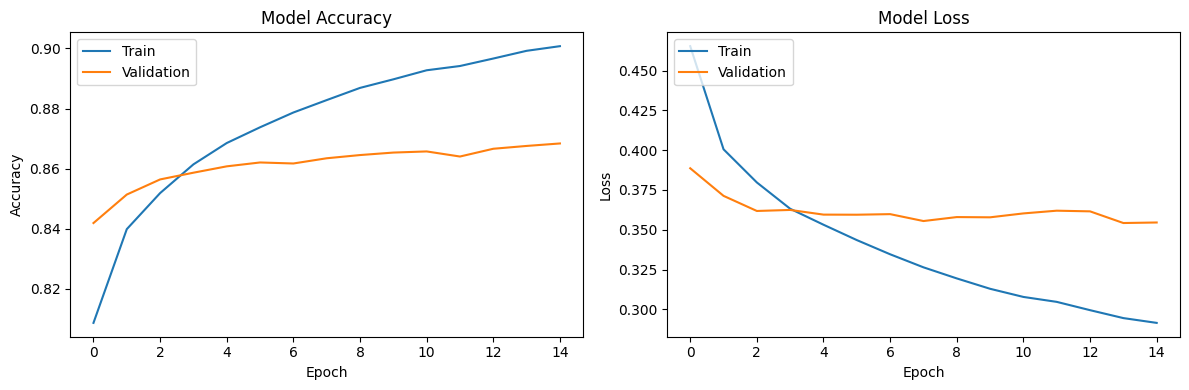

In [76]:
## plot model history 

plot_training_history(loaded_regularized_history)
# loaded_first_history

In [77]:
## make predictions
y_pred_regularized = loaded_regularized_model.predict(X_val)


4539/4539 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step


In [79]:
y_pred_regularized_classes = (y_pred_regularized > threshold).astype(int).flatten()
print("Sample prediction classes:", y_pred_regularized_classes[:10])


Sample prediction classes: [1 0 1 1 0 1 0 0 0 0]


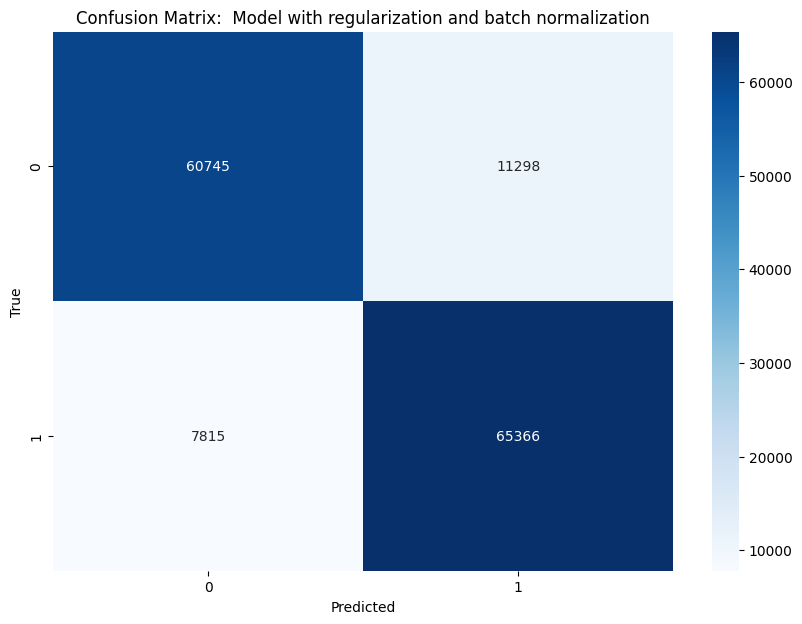

In [80]:

## plotting function 
plot_confusion_matrix(y_val, y_pred_regularized_classes, title="Model with regularization and batch normalization")